In [1]:
from __future__ import unicode_literals

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns

# Set plotting style
plt.style.use('seaborn-white')
FONTSIZE="xx-large"
COLORS = cm.viridis(np.linspace(0.4, 1, 7))

%matplotlib inline

In [2]:
# Date conversion function
def date_columns(query):
    """If a date column is included in the query, parse it as a date in the
    dataframe."""
    dates = []
    fields = ["Collision_Date", "Process_Date"]
    if '*' in query:
        dates = fields
    else:
        for date in fields:
            if date in query:
                dates.append(date)

        if not dates:
            dates = None

    return dates

In [3]:
def run_query(query, sql_file="./switrs.sqlite3"):
    """ Read sqlite query results into a pandas DataFrame. """
    with sqlite3.connect(sql_file) as con:
        # Construct a Dataframe from the results
        df = pd.read_sql_query(
            query,
            con,
            parse_dates = date_columns(query),
        )

        return df

# Data

In [4]:
query = (
    "SELECT Collision_Date, COUNT(1) as Crashes "
    "FROM Collision AS C "
    "WHERE Collision_Date IS NOT NULL "
    "AND Collision_Date <= '2015-12-31' "  # 2016 is incomplete
    "GROUP BY Collision_Date"
)

df = run_query(query)

In [5]:
DATE_COL = "Collision_Date"
CRASH_COL = "Crashes"
DOW_COL = "DOW"

# Set day of the week as a column
df[DOW_COL] = df[DATE_COL].dt.dayofweek

# Plot Function

In [6]:
def make_plot(plot_function, title, file_name, **kawrgs):

    # Set plot size
    fig = plt.gcf()
    fig.set_size_inches(12, 6)

    ax = plot_function(**kawrgs)

    # Set plot title
    plt.title(title, y=1.03, size=28)

    # Set Y and X range
    plt.gca().set_ylim([0, 3000])
    #plt.gca().set_xlim([-0.5, 6.5])
    plt.ylabel("Accidents", fontsize=FONTSIZE)
    plt.xlabel("")

    # Set X tick labels
    ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], size=14)

    plt.savefig(file_name + ".png", bbox_inches='tight')
    plt.savefig(file_name + ".svg", bbox_inches='tight')
    plt.show()

# Box

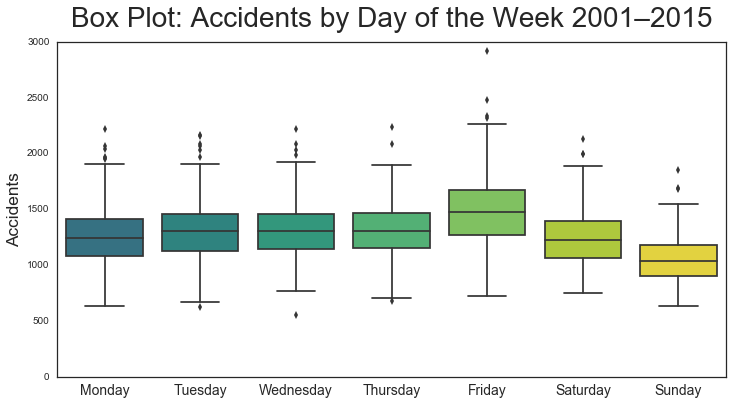

CPU times: user 904 ms, sys: 24 ms, total: 928 ms
Wall time: 2.06 s


In [7]:
%%time

make_plot(
    sns.boxplot,
    'Box Plot: Accidents by Day of the Week 2001–2015',
    "/tmp/accidents_by_day_of_the_week_box",
    x="DOW",
    y="Crashes",
    data=df,
    palette=COLORS,
)

# Strip

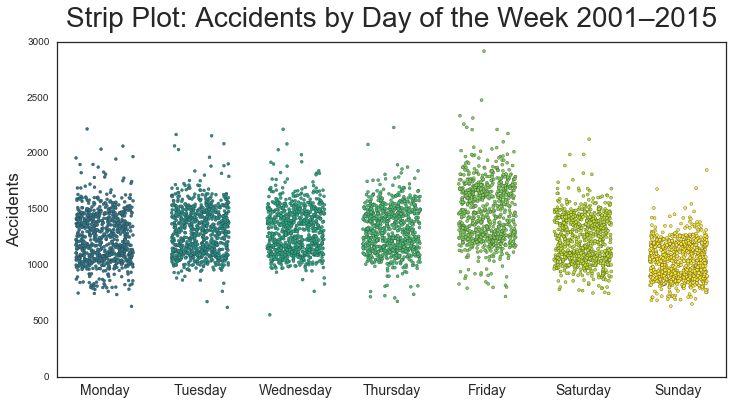

CPU times: user 4.55 s, sys: 64 ms, total: 4.61 s
Wall time: 4.83 s


In [8]:
%%time

make_plot(
    sns.stripplot,
    'Strip Plot: Accidents by Day of the Week 2001–2015',
    "/tmp/accidents_by_day_of_the_week_strip",
    x="DOW",
    y="Crashes",
    data=df,
    palette=COLORS,
    jitter=.3,
    size=3,
    linewidth=.3,
)

# Swarm

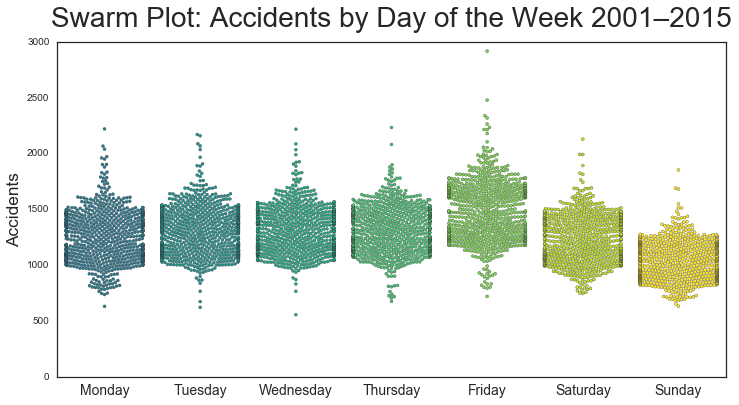

CPU times: user 1min 6s, sys: 644 ms, total: 1min 7s
Wall time: 1min 10s


In [9]:
%%time

make_plot(
    sns.swarmplot,
    'Swarm Plot: Accidents by Day of the Week 2001–2015',
    "/tmp/accidents_by_day_of_the_week_swarm",
    x="DOW",
    y="Crashes",
    data=df,
    palette=COLORS,
    size=3,
    linewidth=.3,
)

In [10]:
# Down sample data frame to improve drawing
df_down = df.sample(frac=0.5-0.25+0.125+0.0625)

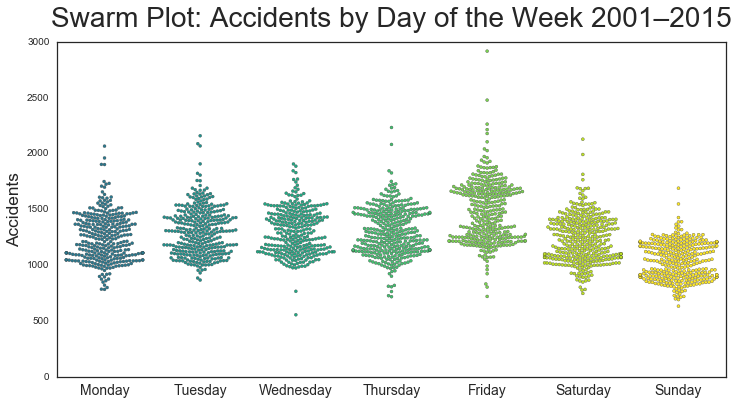

CPU times: user 8.88 s, sys: 148 ms, total: 9.02 s
Wall time: 9.49 s


In [11]:
%%time

make_plot(
    sns.swarmplot,
    'Swarm Plot: Accidents by Day of the Week 2001–2015',
    "/tmp/accidents_by_day_of_the_week_swarm",
    x="DOW",
    y="Crashes",
    data=df_down,
    palette=COLORS,
    size=3,
    linewidth=.3,
)

# Violin

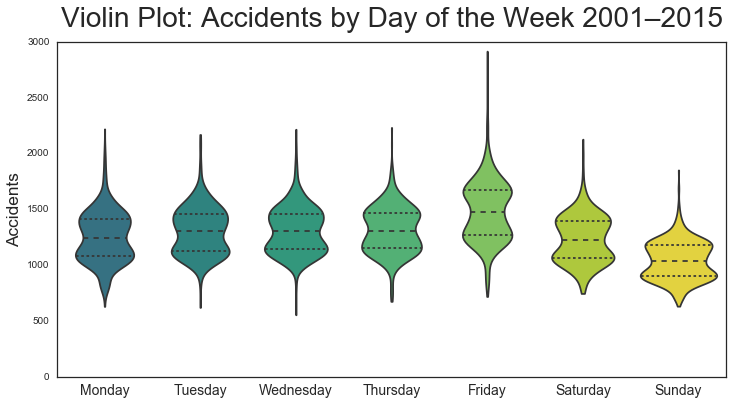

CPU times: user 1.01 s, sys: 44 ms, total: 1.06 s
Wall time: 1.86 s


In [12]:
%%time

make_plot(
    sns.violinplot,
    'Violin Plot: Accidents by Day of the Week 2001–2015',
    "/tmp/accidents_by_day_of_the_week_violin",
    x="DOW",
    y="Crashes",
    data=df,
    palette=COLORS,
    cut=0,
    inner="quartile",
)